### PyTorch Custom Datasets

Getting our own data into PyTorch

In [1]:
# Importing dependencies and device agnostic code
import torch
from torch import nn

torch.__version__

'2.4.1'

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
!nvidia-smi

Thu May 15 06:58:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   46C    P8              2W /  118W |    1258MiB /   8188MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# FoodVision Mini
'''
Our dataset is a subset of the Food101 dataset.

Our datasest starts with 3 classes of food and only 75 training / 25 testing images.
'''
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Datasets")
image_path = data_path / "pizza_steak_sushi."

if image_path.is_dir():
    print(f'{image_path} already exists!')
else:
    print(f'{image_path} doesn`t exist creating one')
    image_path.mkdir(parents=True, exist_ok=True)

# Downloading
with open(data_path / 'pizza_steak_sushi.zip', "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading food imaged data!")
    f.write(request.content)

# Unzipping
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data!")
    zip_ref.extractall(image_path)

Datasets\pizza_steak_sushi. already exists!
Unzipping pizza, steak and sushi data!


## Data Preparation and Exploration

In [5]:
import os
def walk_through_dir(dir_path):
    """ 
    Walks through dir_path returning its contents
    """

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Datasets\pizza_steak_sushi.'
There are 3 directories and 0 images in 'Datasets\pizza_steak_sushi.\test'
There are 0 directories and 25 images in 'Datasets\pizza_steak_sushi.\test\pizza'
There are 0 directories and 19 images in 'Datasets\pizza_steak_sushi.\test\steak'
There are 0 directories and 31 images in 'Datasets\pizza_steak_sushi.\test\sushi'
There are 3 directories and 0 images in 'Datasets\pizza_steak_sushi.\train'
There are 0 directories and 78 images in 'Datasets\pizza_steak_sushi.\train\pizza'
There are 0 directories and 75 images in 'Datasets\pizza_steak_sushi.\train\steak'
There are 0 directories and 72 images in 'Datasets\pizza_steak_sushi.\train\sushi'


In [7]:
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir # Built for prebuilt data loading in pytorch

(WindowsPath('Datasets/pizza_steak_sushi./train'),
 WindowsPath('Datasets/pizza_steak_sushi./test'))

### Visualizing an imge

1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class using `pathlib.Path.parent.stem`
4. Opening images with Python's PIL (Python Imaging Library)
5. Show image and print metadata

In [8]:
# Visualizing a random image
import random
from PIL import Image

torch.manual_seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # Lists all images with .jpg extensions

image_path_list

[WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1152100.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1503858.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1687143.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/1925494.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/194643.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/195160.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2003290.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2019408.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2111981.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2124579.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2218680.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2236338.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2508636.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/pizza/2871261.jpg'),
 WindowsPath('Datasets/pizza_steak_sushi./test/piz

Datasets\pizza_steak_sushi.\train\steak\2222018.jpg
Random Image Path: Datasets\pizza_steak_sushi.\train\steak\2222018.jpg
Image Class: steak
Image Height: 512
Image Width: 512


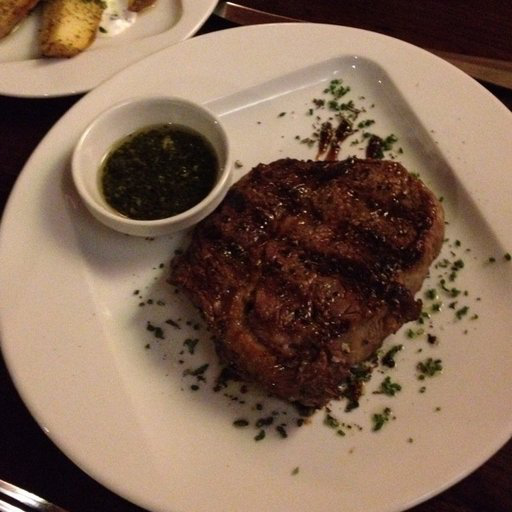

In [9]:
torch.manual_seed(42)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class
image_class = random_image_path.parent.stem
image_class

# 4. Open image
img = Image.open(random_image_path)

# 5. Print Metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

Text(0.5, 1.0, 'Image Class: steak | Image Shape: (512, 512, 3): [ht, wt, color_channels]')

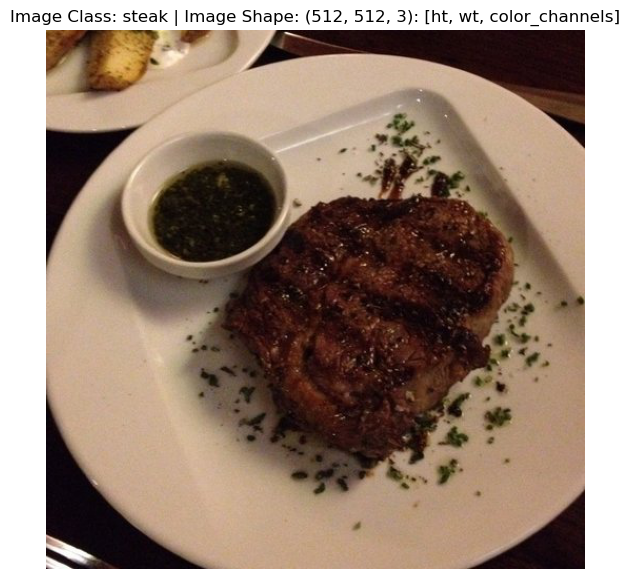

In [10]:
# Visualize using matplotlib
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis('off')
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}: [ht, wt, color_channels]")

In [11]:
img_as_array

array([[[147, 105,  47],
        [143, 101,  43],
        [139,  97,  39],
        ...,
        [ 29,   7,  10],
        [ 28,   6,   9],
        [ 29,   7,  10]],

       [[137,  95,  37],
        [129,  87,  29],
        [125,  82,  27],
        ...,
        [ 28,   6,   9],
        [ 29,   7,  10],
        [ 33,  11,  14]],

       [[114,  69,  14],
        [114,  69,  14],
        [117,  72,  17],
        ...,
        [ 27,   5,   8],
        [ 30,   8,  11],
        [ 35,  13,  16]],

       ...,

       [[166, 147, 149],
        [178, 159, 161],
        [197, 181, 182],
        ...,
        [ 21,   9,  11],
        [ 21,   9,   9],
        [ 21,   9,   9]],

       [[119,  98, 103],
        [140, 119, 124],
        [164, 145, 149],
        ...,
        [ 21,   9,  11],
        [ 20,  10,   9],
        [ 19,   9,   8]],

       [[ 37,  16,  21],
        [ 79,  58,  63],
        [127, 108, 112],
        ...,
        [ 20,  10,  11],
        [ 20,  10,   9],
        [ 19,   9,   8]]

In [12]:
# Converting all images to tensors then datasets then dataloader
# Transform parameter

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.4863, 0.4706, 0.4706,  ..., 0.1216, 0.1137, 0.1176],
         [0.4863, 0.4549, 0.3804,  ..., 0.1255, 0.1216, 0.1255],
         [0.5216, 0.4431, 0.4118,  ..., 0.1294, 0.1333, 0.1294],
         ...,
         [0.6078, 0.8235, 0.8314,  ..., 0.1020, 0.1098, 0.0980],
         [0.4078, 0.3804, 0.6510,  ..., 0.0784, 0.0941, 0.1059],
         [0.8549, 0.7529, 0.4275,  ..., 0.0667, 0.0824, 0.0941]],

        [[0.2941, 0.2667, 0.2510,  ..., 0.0392, 0.0353, 0.0353],
         [0.2941, 0.2510, 0.1686,  ..., 0.0431, 0.0392, 0.0353],
         [0.3255, 0.2471, 0.2510,  ..., 0.0431, 0.0392, 0.0392],
         ...,
         [0.5333, 0.7686, 0.8157,  ..., 0.0353, 0.0392, 0.0392],
         [0.3608, 0.3412, 0.6235,  ..., 0.0275, 0.0314, 0.0392],
         [0.8235, 0.7333, 0.3961,  ..., 0.0235, 0.0235, 0.0314]],

        [[0.1059, 0.1059, 0.1059,  ..., 0.0392, 0.0431, 0.0431],
         [0.1176, 0.1059, 0.0784,  ..., 0.0431, 0.0431, 0.0431],
         [0.1373, 0.1059, 0.1373,  ..., 0.0510, 0.0471, 0.

In [14]:
data_transform(img).shape # From HWC to CHW when changed to Tensors

torch.Size([3, 64, 64])

In [15]:
data_transform(img).dtype

torch.float32

'\nSize is reduced so pictures are more pixelated, simpler\n\nEasier processing but might cause some loss in image details\n'

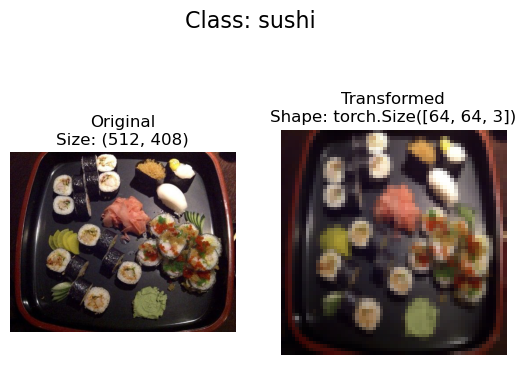

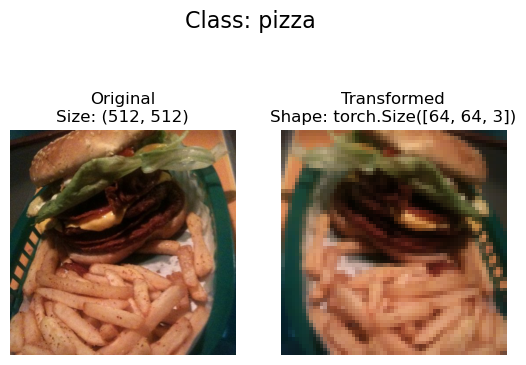

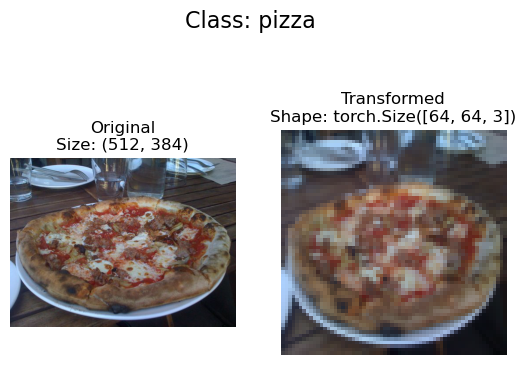

In [16]:
# Visualizing the transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2) 
            # Figure of size (1,2) -> [<Axes0>, <Axes1>], ax is to represent Axes0 and Axes1
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) 
            # Tensor: (C, H, W) but matplotlib requires (H, W, C), so permutation is done
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

"""
Size is reduced so pictures are more pixelated, simpler

Easier processing but might cause some loss in image details
"""